# Introdução à Ciência de Dados

## Regras
1. Este projeto pode ser realizado em duplas.
2. Vocês podem escolher um dataset da sua preferência, ou fazer o que se pede com o dataset fornecido.
3. O tempo de desenvolvimento será de 2 semanas, e a forma de submissão será anunciada posteriormente (via Moodle ou github).
4. Vocês devem submeter um relatório, em Jupyter Notebook, explicando os passos de cada fase do trabalho.
5. Também será necessário realizar uma apresentação, ou uma defesa do seu trabalho. Como temos pouco tempo, esta defesa poderá ser feita de maneira remota e assíncrona.

## Dados próprios
Caso escolham prosseguir com o trabalho com um dataset da sua preferência, o seu trabalho deverá:
1. Deixar clara a motivação e as perguntas e ou problemas que podem ser resolvidos com o uso dos dados.
2. Realizar uma Análise Exploratória dos Dados que seja capaz de trazer luz aos questionamentos do item 1.
3. Realizar teste de hipótese para validar pelo menos uma das questões levantadas no item 1. Definir de maneira clara as hipóteses, a estatística e a metodologia dos testes.
4. Desenvolver um modelo supervisionado, e analisar os resultados.

## Dados fornecidos

Dados de preço de casa, disponível na pasta `data/home_data.csv`

## Tarefas

1. Análise Exploratória dos Dados
    1.1 Análise descritiva
    1.2 Visualizações
    1.3 Teste de Hipóteses: Há diferença de preço significativa entre casas térreas e casas com mais de um andar?
2. Fazer uma regressão linear para prever o preço das casas. Analisar os resultados.




**Índice**

* 1. Introdução
* 2. Resumo Estatístico 
* 3. Identificação dos Valores Nulos (NaN)
* 4. Tratamento de Dados
* 5. Correlação
* 6. Skewness e Kurtosis
* 7. Identificação de Outliers
* 8. Visualizações
* 9. Teste de Hipóteses
* 10. Regressão Linear

## EDA

## 1. Introdução 

O presente projeto busca realizar um estudo de dados imobiliários nos anos de 2014 e 2015. Nesse sentido realizamos Análise Exploratória dos Dados, Análise descritiva, Visualizações, Teste de Hipóteses (Há diferença de preço significativa entre casas térreas e casas com mais de um andar?) e Regressão Linear para prever o preço dos imovéis.

### 1.1 Análise Descritiva

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

In [5]:
df = pd.read_csv("/workspaces/projeto-icd-yasmym/data/home_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### 2. Resumo Estatistico

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
#Estatísticas descritivas para um DataFrame.
#Ele resume a **tendência central**, a **dispersão** e a forma da **distribuição** de um conjunto de dados, excluindo valores NaN.
df.describe() 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
df['price'].min()

75000

In [10]:
df['price'].max()

7700000

In [11]:
df["bedrooms"].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

## 3. Identificação dos valores nulos (NaN)

In [12]:
df.isnull().count()

id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

In [13]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 4. Tratamento de dados

In [14]:
df["bathrooms"] = df['bathrooms'].astype(int)
df['bathrooms']

0        1
1        2
2        1
3        3
4        2
        ..
21608    2
21609    2
21610    0
21611    2
21612    0
Name: bathrooms, Length: 21613, dtype: int64

In [15]:
df['floors'] = df['floors'].astype(int)
df["floors"].value_counts()

floors
1    12590
2     8402
3      621
Name: count, dtype: int64

In [16]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')
df['date']


0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [17]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## 5. Correlação

A matrix de correlação contém valores de correlação entre -1 e 1, onde 1 indica uma correlação positiva perfeita, 0 indica nenhuma correlação e -1 indica uma correlação negativa perfeita.

In [18]:
df.corr()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.005577,-0.016762,0.001286,-0.000038,-0.012258,-0.132109,0.019120,-0.002721,0.011592,...,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
date,0.005577,1.000000,-0.004357,-0.016800,-0.029478,-0.034559,0.006313,-0.019079,0.001356,-0.001800,...,-0.039912,-0.027924,-0.019469,-0.000355,-0.024509,0.001404,-0.032856,-0.007020,-0.031515,0.002566
price,-0.016762,-0.004357,1.000000,0.308350,0.510072,0.702035,0.089661,0.237211,0.266369,0.397293,...,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,-0.016800,0.308350,1.000000,0.467452,0.576671,0.031703,0.155643,-0.006582,0.079532,...,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,-0.000038,-0.029478,0.510072,0.467452,1.000000,0.697875,0.085310,0.484822,0.058798,0.177257,...,0.606631,0.639933,0.250880,0.433647,0.060436,-0.159773,0.031351,0.179351,0.510049,0.080779
sqft_living,-0.012258,-0.034559,0.702035,0.576671,0.697875,1.000000,0.172826,0.353321,0.103818,0.284611,...,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.006313,0.089661,0.031703,0.085310,0.172826,1.000000,-0.008951,0.021604,0.074710,...,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.019120,-0.019079,0.237211,0.155643,0.484822,0.353321,-0.008951,1.000000,0.019640,0.024658,...,0.472608,0.517913,-0.235836,0.578619,-0.007775,-0.096743,0.029567,0.159001,0.296561,-0.013252
waterfront,-0.002721,0.001356,0.266369,-0.006582,0.058798,0.103818,0.021604,0.019640,1.000000,0.401857,...,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,-0.001800,0.397293,0.079532,0.177257,0.284611,0.074710,0.024658,0.401857,1.000000,...,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575


## 6. Skewness e Kurtosis

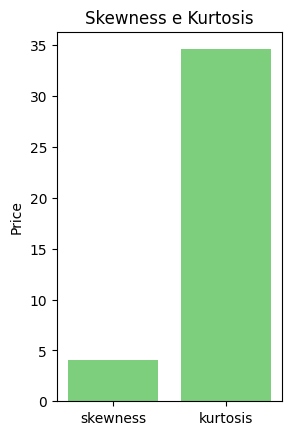

4.02406912248237
34.5855403473908


In [19]:
skewness = df['price'].skew()
kurtosis = df['price'].kurtosis()

plt.subplot(1, 2, 2)
sns.barplot(x=['skewness', 'kurtosis'], y=[skewness, kurtosis], color='#70db70')
plt.title('Skewness e Kurtosis')
plt.ylabel('Price')
plt.show()

print(skewness)
print(kurtosis)

### Para interpretar o gráfico acima é necessário primeiramente entender o que Skewness e Kurtosis. 
 - Skewness: mede a simetria da distribuição de probabilidade(ou a falta dela) de uma variável aleatória de valor real em relação à sua média.
        Positiva: Quando a cauda direita é mais longa (inclinação para a direita).
        Negativa: Quando a cauda esquerda é mais longa (inclinação para a esquerda).
        Zero: Quando a distribuição é simétrica.
 - Kurtosis: mede a "cauda" da distribuição de probabilidade de uma variável aleatória com valor real.
   Distribuições com alta Kurtosis têm caudas mais pesadas (mais valores extremos), enquanto distribuições com baixa Kurtosis têm caudas mais leves.
 
O gráfico acima mostra uma Skewness com um valor positivo(4.02) indica que a distribuição é inclinada para a direita (positivamente assimétrica), como é inclinada para a direita os valores extremos são mais altos. Temos um valor alto de Kurtosis (34.59) indica uma distribuição leptocúrtica (caudas pesadas). 

Apenas como revisão os tipos de kurtosis:

Mesocúrtica:

    --> A distribuição mesocúrtica se assemelha à distribuição normal (ou em forma de sino).

        Ela tem um pico moderado e caudas que não são muito longas nem muito curtas.

Leptocúrtica:

    --> Uma distribuição leptocúrtica tem picos mais altos e caudas mais longas.

        Isso significa que os valores extremos são mais comuns, tornando a distribuição mais concentrada em torno da média.

Platicúrtica:

    --> Uma distribuição platicúrtica é mais plana, com caudas mais curtas.

        Os valores estão mais dispersos, resultando em uma distribuição mais ampla.
        

## 7. Identificação de Outliers

Preço varia entre 75000 e 7700000 mil dolares.

Quantidade de casas 21613 unidades.

Text(0.5, 1.0, 'Histograma')

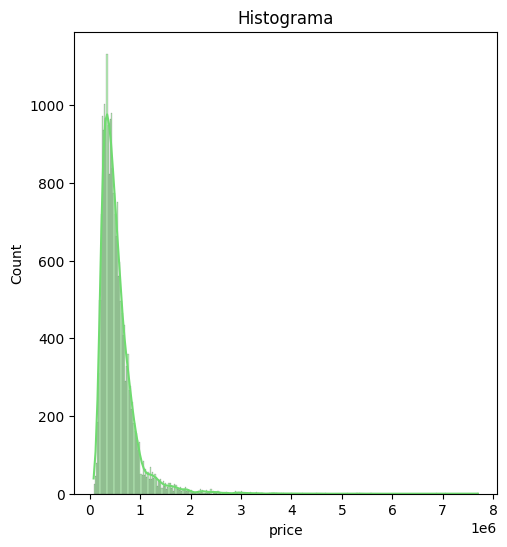

In [20]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(df['price'], kde=True, color='#70db70')
plt.title('Histograma')

Em ambos ao gráficos é possivel notar claramente a presença de outlier, nesse caso são as casas que possuem um valor muito elevado.

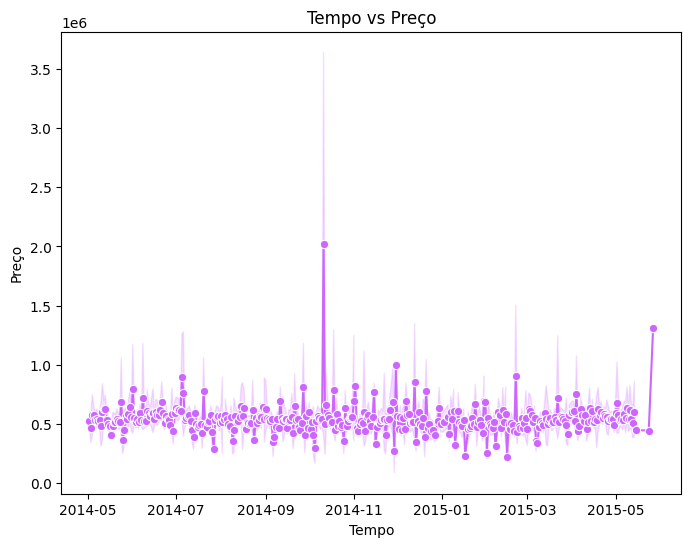

In [69]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='date', y='price', data=df, marker='o', color='#cc66ff')
plt.xlabel('Tempo')
plt.ylabel('Preço')
plt.title('Tempo vs Preço')
plt.show()

## 8. Visualizações

### Distribuição dos Dados: Histograma

In [22]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


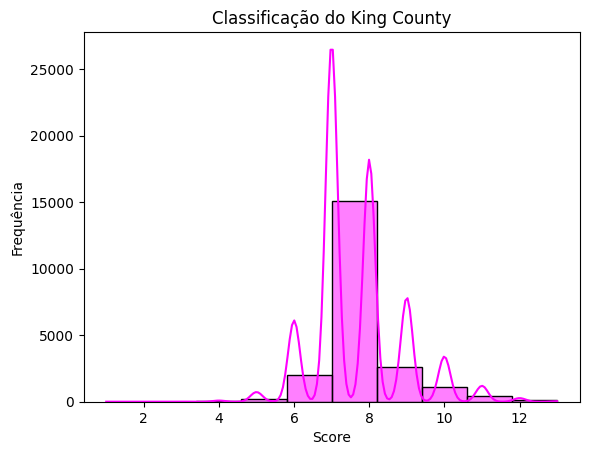

In [76]:
sns.histplot(df['grade'], bins=10, kde=True, color='#ff00ff')
plt.xlabel('Score')
plt.ylabel('Frequência')
plt.title('Classificação do King County')
plt.show()

In [80]:
df_filtrada_grade = df[df['grade'] == 8]
df_filtrada_grade
#df_filtrada_preco = df_filtrada_grade[df_filtrada_grade['price'].max()]
#df_filtrada_preco
#min preço 140000  #max preço 3070000

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4,1954400510,2015-02-18,510000,3,2,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
10,1736800520,2015-04-03,662500,3,2,3560,9796,1,0,0,...,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
22,7137970340,2014-07-03,285000,5,2,2270,6300,2,0,0,...,8,2270,0,1995,0,98092,47.3266,-122.169,2240,7005
24,3814700200,2014-11-20,329000,3,2,2450,6500,2,0,0,...,8,2450,0,1985,0,98030,47.3739,-122.172,2200,6865
26,1794500383,2014-06-26,937000,3,1,2450,2691,2,0,0,...,8,1750,700,1915,0,98119,47.6386,-122.360,1760,3573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,9834201367,2015-01-26,429000,3,2,1490,1126,3,0,0,...,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21607,2997800021,2015-02-19,475000,3,2,1310,1294,2,0,0,...,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,263000018,2014-05-21,360000,3,2,1530,1131,3,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000,4,2,2310,5813,2,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200


In [24]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


### Gráficos de Dispersão

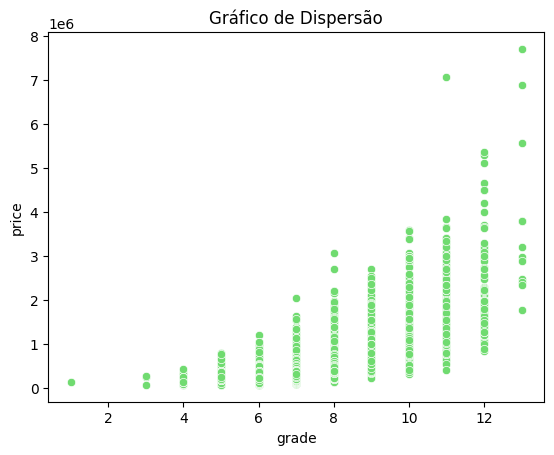

In [26]:
sns.scatterplot(x=df['grade'], y=df['price'], marker='o', color='#70db70')
plt.xlabel("grade")
plt.ylabel('price')
plt.title("Gráfico de Dispersão")
plt.show()

Pontuação entre 10 ao 11 os preços chegam em 4, valore acima 12 começa a aparecer os outliers(preços muito altos com pontuação alta).

Baixa pontuação baixo preço.

Alta pontuação alto preço. 

Há alguns outlier, pois não há muitos imoveis com preço com os valores máximos, mas sabemos os que tem um valor alto também tem pontuação entre 11 ao 13.

In [27]:
df['grade'].min() #1 ao 13
df['price'].max() #7700000

7700000

### Gráficos de Densidade

In [28]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


### Correlação

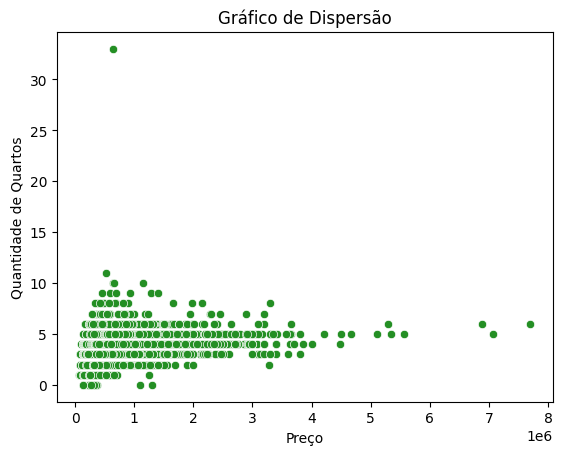

In [83]:
sns.scatterplot(x='price', y='bedrooms', data=df, color='#248f24')
plt.xlabel('Preço')
plt.ylabel('Quantidade de Quartos')
plt.title('Gráfico de Dispersão')
plt.show()


A maioria dos imovéis tem no máximo 4 quartos, os que possuem 5 ou mais são em menor quantidade. Quantos mais quartos, menos imóveis no dataset. Esse dataset seria mais para compradores de classe média, classe média alta e classe alta.

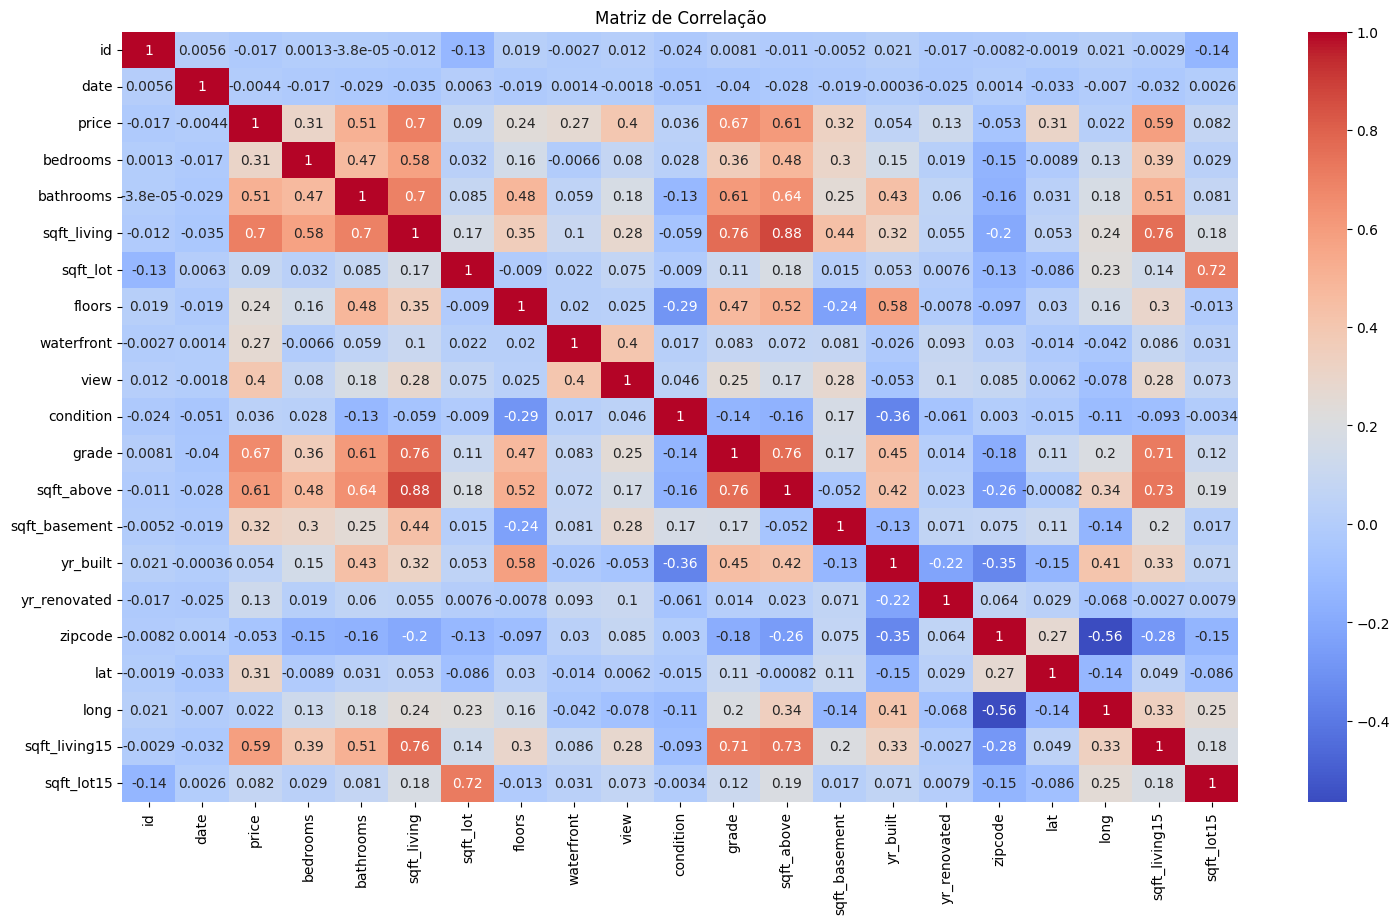

In [30]:
plt.figure(figsize=(18, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

#### Analise de Correlação:
Na matrix de correção demonstrada que cada celula representa o coeficiente de correlação entre duas variáveis, onde vermelho escuro indica uma forte correlação positiva, azul escuro indica uma forte correlação negativa e branco/cores claras indica fraca ou sem correlação entre essas variáveis. Por exemplo as variáveis "price" e "condition" tem uma correlação positiva significativa fraca por ser azul claro com o valor de 0.036, enquanto, "sqft_above" e "sqft_lot" tem uma postiva forte com 0.88 laranja forte. "Grade" e "sqft_basement" possuit uma correlação bem fraca com 0.17 uma cor clara quase branco.

### Evolução dos preços atráves dos anos.

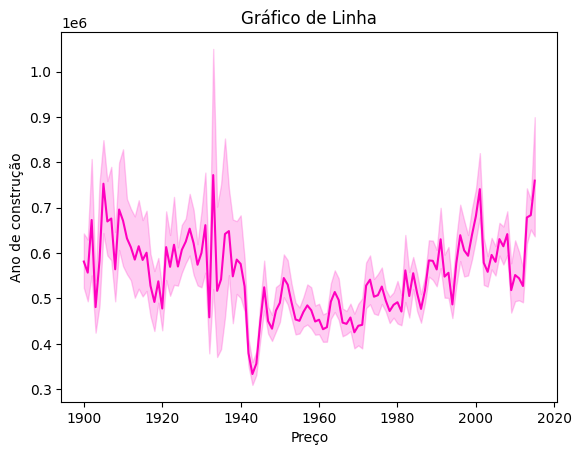

In [31]:
sns.lineplot(x=df['yr_built'], y=df['price'], markers='o', color='#ff00bf')
plt.xlabel('Preço')
plt.ylabel('Ano de construção')
plt.title('Gráfico de Linha')
plt.show()

In [86]:
df['floors'].max() #máximo 3 andares, min 1 andar

3

É possivel notar que casas apenas um andar não diz sobre o preço do imóvel, ou seja não é quantidade de andares que define o aumento ou não do preço.

In [91]:
dx = df[df['floors'] == 1 ]
dx['price'].max()

4668000

In [93]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

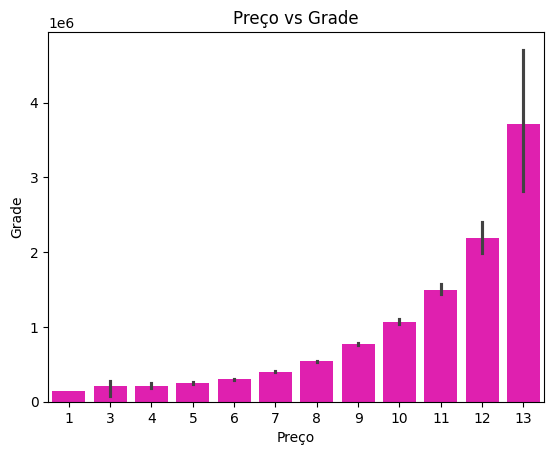

In [97]:
sns.barplot(x=df['grade'], y=df['price'],color='#ff00bf')
plt.xlabel('Preço')
plt.ylabel('Grade')
plt.title('Preço vs Grade')
plt.show()

O preço aumenta em correlação com o alto valore de pontuação no grade.

In [34]:
df['condition'].max()
df['condition'].min() #1 to 5

1

/tmp/ipykernel_41094/1409324649.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['condition'], y=df['price'], palette='pastel')


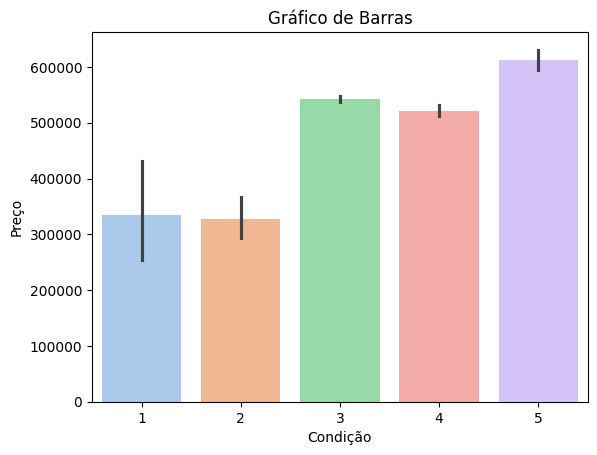

In [35]:
sns.barplot(x=df['condition'], y=df['price'], palette='pastel')
plt.xlabel('Condição')
plt.ylabel('Preço')
plt.title('Gráfico de Barras')
plt.show()

#Melhor condição melhor preço
#porque os de condição 2 e 4 não estão com melhores valores ?

Melhor condição do imóvel, maior o preço.

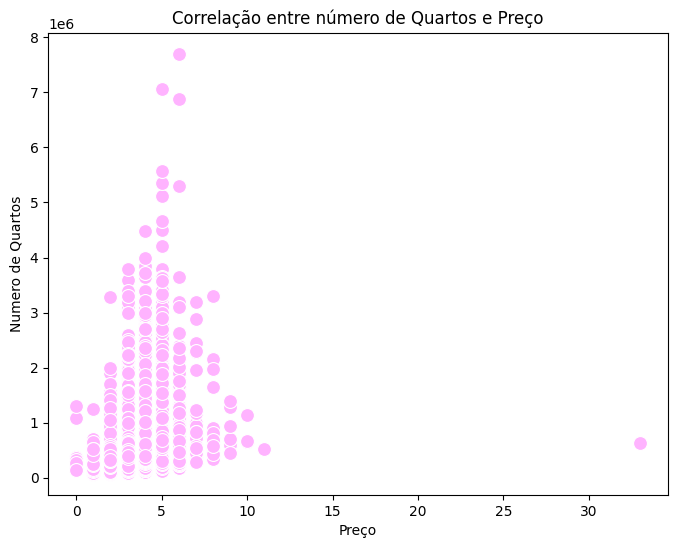

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="bedrooms", y='price', color="#ffb3ff", s=100)
plt.title("Correlação entre número de Quartos e Preço")
plt.ylabel('Numero de Quartos')
plt.xlabel("Preço")
plt.show()

## 9. Teste de Hipóteses

Um teste escolhe entre dois pontos de vista de como os dados são gerados

Os pontos de vista são chamados hipóteses.

O teste escolhe a hipótese que é melhor suportada pelos dados observados.

--> Hipotese nula: Há diferença de preço.

--> Hipotese alternativa: Não há diferença de preço

O teste que utilizamos é o Teste Estatístico (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)

Apenas para conhecimento o valor p é uma forma de medir a significância dos resultados.

O valor p ajuda a interpretar a probabilidade de observar os dados ou resultados mais extremos se a hipótese nula fosse verdadeira.

alpha = 0.05 Normalmente utilizamos esse valor https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test

In [37]:
from scipy.stats import ttest_ind

alpha = 0.5
valor_estatistico, p_valor = ttest_ind(df["price"], df["condition"], equal_var=False)
if p_valor < alpha:
    print("Valor rejeitado da hipotes nula")
else:
    print("Não rejeita o valor da hipotese nula")

Valor rejeitado da hipotes nula


## 10. Regressão Linear

Regressão linear é uma tecnica para prever a relação entre variáveis.

Dividimos entre variáveis dependentes e independentes:

ex.: Dependente('price') e  independente ('bedrooms', 'sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15').

Para se realizar a regressão linear dar enfâse em alguns pontos:
- Regressão linear ocorre apenas entre variáveis númericas.
- Nesse caso estamos realizando uma Multivariate Linear Regression usando Scikit-learn.(https://datagy.io/python-sklearn-linear-regression/)

Aqui está a formula da regressão linear:

--> Onde o beta_0 é o valor da variavel dependente nesse caso é o preço;

--> O Beta_1 é o coeficiente associado a variável independente nesse caso são;

--> O x1 é o valor da variavel independente. 

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><semantics><mrow><mi>y</mi><mo>=</mo><msub><mi>β</mi><mn>0</mn></msub><mo>+</mo><msub><mi>β</mi><mn>1</mn></msub><msub><mi>x</mi><mn>1</mn></msub><mo>+</mo><msub><mi>β</mi><mn>2</mn></msub><msub><mi>x</mi><mn>2</mn></msub><mo>+</mo><mo>…</mo><mo>+</mo><msub><mi>β</mi><mn>10</mn></msub><msub><mi>x</mi><mn>10</mn></msub></mrow><annotation encoding="application/x-tex"> y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \ldots + \beta_{10}x_{10} </annotation></semantics></math>

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#X = df[['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15']] # Variavel independente
X = df[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'zipcode',
       'lat', 'long']]
y = df['price'] # Variavel dependente

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
multi_model = LinearRegression()

#Aqui estou chamando o modelo para realizar o fit (treinamento) do modelo
#Quando chamamos o fit no .model essa função pega os valores dados e "fits" o model aos dados de treino.
multi_model.fit(X_train, y_train)

#Minha predições dos possiveis valores para o preço.
predictions = multi_model.predict(X_test)

#O calculo do valor do R-Squared com a variável "prediction" é o resultado das predições realizadas pelo modelo conjuntamente com "y_test"
#"y_test" onde está parte dos meus dados para teste depois que acontece o split
raiz_quadrada_do_erro = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)
print("R-Squared aqui ---> ", r2)
print("Raiz quadrada do erro aqui --->", raiz_quadrada_do_erro)

R-Squared aqui --->  0.7021754938595012
Raiz quadrada do erro aqui ---> 212188.9002032627


/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R2 coeficiente de determinação --> proporção da variável dependente no meu caso o preço, sendo explicada pelas variáveis independentes no modelo linear. O R2 sendo 70.22% indica a variação do preço das casas sendo explicado pela variáveis independentes, no meu caso seria todas as variavéis exceto o preço . O R2 varia entre 0 e 1, valores próximos de 1 indica que o modelo demontrou bem os valores dos dados, enquanto valores próximos de 0 é o contrário. No caso do meu modelo avalia bem as variações no preço das casas em correlação com as demais features do meu dataset. R2 relativamente alto.

Raiz quadrada do erro (MSE) é a diferença entre os valores previstos pelo modelo e os valores reais. Quanto menor o MSE melhor o modelo se ajusta aos dados, no meu caso o modelo só erra por 212.188 dolares(moeda utilizada acredito), valor bem baixo para casas com valores que variam entre 75000 e 7700000 mil dolares.

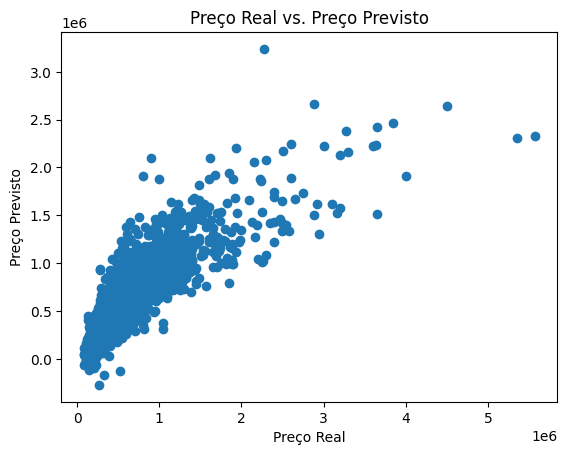

In [64]:
plt.scatter(y_test, predictions)
plt.xlabel("Preço Real")
plt.ylabel("Preço Previsto")
plt.title("Preço Real vs. Preço Previsto")
plt.show()

Para se ler o gráfico acima é necessário resaltar que este realiza predições fazendo uma correlação entre os valores atuais e valores previstos. Um gráfico de predições com bons resultados forma uma linha diagonal onde y=x. Há uma leve linha diagonal onde os resultados se encontram. A cerca da Accuracy é necessário notar o quão próximo os pontos estão da "linha diagonal" criada, no nosso caso há uma forte próximidade no início e uma leve proximidade no final da linha diagonal. Há outliers com preços dos apartamentos variando entre 75.000 a 7700000.